In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context="paper", style="whitegrid", 
       rc={
           "figure.figsize": (9, 5),
           "figure.dpi": 100
       })

instagram = ["#405DE6", "#5B51D8", "#833AB4", "#C13584", 
             "#E1306C", "#FD1D1D", "#F56040", "#F77737", "#FCAF45", "#FFDC80"]
google = ["#4285F4", "#DB4437", "#F4B400", "#0F9D58"]
sns.set_palette(google)

## Import Data

In [2]:
df = pd.read_csv('./data/train_V2.csv')

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df = df[df['matchType'] == 'solo-fpp']
df.drop(labels=['DBNOs', 'revives'], axis=1, inplace=True)
df.shape

(536762, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536762 entries, 4 to 4446965
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               536762 non-null  object 
 1   groupId          536762 non-null  object 
 2   matchId          536762 non-null  object 
 3   assists          536762 non-null  int64  
 4   boosts           536762 non-null  int64  
 5   damageDealt      536762 non-null  float64
 6   headshotKills    536762 non-null  int64  
 7   heals            536762 non-null  int64  
 8   killPlace        536762 non-null  int64  
 9   killPoints       536762 non-null  int64  
 10  kills            536762 non-null  int64  
 11  killStreaks      536762 non-null  int64  
 12  longestKill      536762 non-null  float64
 13  matchDuration    536762 non-null  int64  
 14  matchType        536762 non-null  object 
 15  maxPlace         536762 non-null  int64  
 16  numGroups        536762 non-null  int

In [6]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

### drop na

In [7]:
df = df.dropna()

## Stats

In [8]:
df.iloc[:, 0:15].describe()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration
count,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000
mean,0.057640,1.058980,118.918804,0.251553,1.009678,48.025596,460.651884,0.934731,0.482457,21.701100,1577.081990
std,0.245489,1.791553,158.345782,0.633480,2.383454,27.579939,606.861920,1.495987,0.556407,45.716959,249.372334
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1044.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1377.000000
50%,0.000000,0.000000,75.790000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,1439.000000
75%,0.000000,2.000000,171.000000,0.000000,1.000000,72.000000,1120.000000,1.000000,1.000000,22.060000,1854.000000
max,5.000000,28.000000,2305.000000,16.000000,63.000000,100.000000,1970.000000,23.000000,5.000000,940.100000,2199.000000


In [9]:
df.iloc[:, 15:].describe()

,maxPlace,numGroups,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000
mean,95.051192,92.696308,963.338642,403.209692,0.003488,4.824648,0.010183,0.003499,945.309091,3.486528,563.691406,0.491835
std,4.850009,5.077241,747.432486,1270.646059,0.061611,32.658268,0.100397,0.061398,1075.042738,2.327555,730.821547,0.295021
min,8.000000,8.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.000000,91.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.090000,2.000000,0.000000,0.236600
50%,96.000000,93.000000,1496.000000,0.000000,0.000000,0.000000,0.000000,0.000000,467.700000,3.000000,0.000000,0.489100
75%,97.000000,95.000000,1520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1577.000000,5.000000,1491.000000,0.747400
max,100.000000,100.000000,2853.000000,40710.000000,4.000000,1974.000000,1.000000,5.000000,25780.000000,153.000000,1922.000000,1.000000


## Clean Data

### Weapon Acquired

In [10]:
df['weaponsAcquired'].value_counts()

2      92874
3      90759
1      80942
4      79793
5      61605
6      41963
0      33031
7      25584
8      14459
9       7693
10      3881
11      2030
12      1039
13       514
14       286
15       133
16        71
17        40
18        26
19        16
21         8
20         4
23         4
24         2
28         1
22         1
25         1
153        1
Name: weaponsAcquired, dtype: int64

In [11]:
df.drop(df[df['weaponsAcquired'] > 20].index, inplace=True)

In [12]:
df['weaponsAcquired'].value_counts()

2     92874
3     90759
1     80942
4     79793
5     61605
6     41963
0     33031
7     25584
8     14459
9      7693
10     3881
11     2030
12     1039
13      514
14      286
15      133
16       71
17       40
18       26
19       16
20        4
Name: weaponsAcquired, dtype: int64

## Add Columns

In [13]:
df['headshotRate'] = df['headshotKills'] / df['kills']
df['headshotRate'].fillna(0, inplace=True)

df['headshotRate']

4          0.00
7          0.00
13         0.25
17         0.00
35         0.00
           ... 
4446946    0.00
4446950    0.00
4446954    0.00
4446959    0.00
4446965    0.00
Name: headshotRate, Length: 536743, dtype: float64

In [14]:
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']
df['itemUsed'] = df['heals'] + df['boosts']

## EDA

In [15]:
df1 = pd.read_csv("./data/train_V2.csv")
df1 = df1.dropna()

In [16]:
df1.drop_duplicates(['matchId']).groupby(['matchType']).count()['matchId']

matchType
crashfpp               73
crashtpp                5
duo                  3356
duo-fpp             10620
flarefpp                9
flaretpp               29
normal-duo             12
normal-duo-fpp        158
normal-solo            23
normal-solo-fpp        96
normal-squad           16
normal-squad-fpp      358
solo                 2297
solo-fpp             5678
squad                6658
squad-fpp           18576
Name: matchId, dtype: int64

> นับว่าแต่ละ mode มีกี่ match

## kill vs win

In [17]:
df_kill_win = df[['kills', 'winPlacePerc']]
df_kill_win.head()

,kills,winPlacePerc
4,1,0.1875
7,0,0.7368
13,4,0.8750
17,2,0.8211
35,1,0.3474


In [18]:
df_kill_win["winPlacePerc"] = np.round(df_kill_win["winPlacePerc"], 1)

<ipython-input-18-552b93daffad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kill_win["winPlacePerc"] = np.round(df_kill_win["winPlacePerc"], 1)


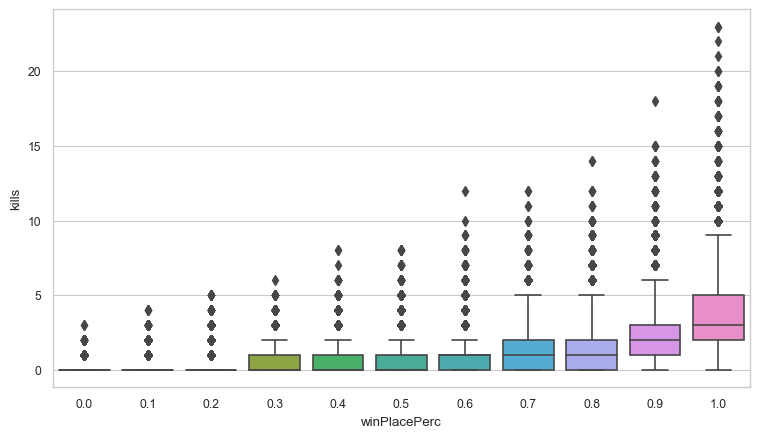

In [19]:
sns.boxplot(x="winPlacePerc", y="kills", data=df_kill_win)
plt.show()

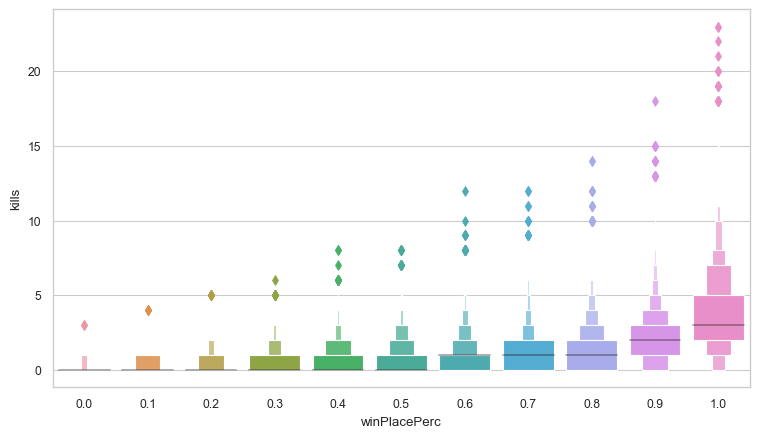

In [20]:
sns.boxenplot(x="winPlacePerc", y="kills", data=df_kill_win)
plt.show()

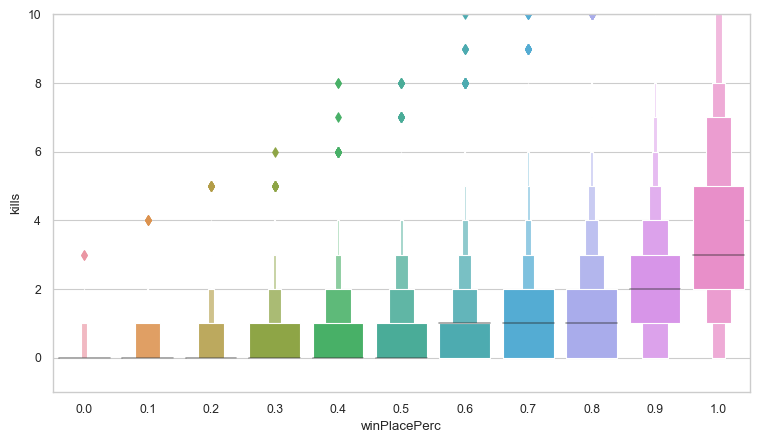

In [21]:
sns.boxenplot(x="winPlacePerc", y="kills", data=df_kill_win)
plt.ylim([-1, 10])
plt.show()

In [22]:
df_kill_win = df[['kills', 'winPlacePerc']]
dfgroup_kill_win = pd.cut(df_kill_win['kills'], [-1, 2, 6, 30], labels=['0-2', '3-6', '7+'])
df_kill_win['kill_group'] = dfgroup_kill_win

<ipython-input-22-58817a3ccf22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kill_win['kill_group'] = dfgroup_kill_win


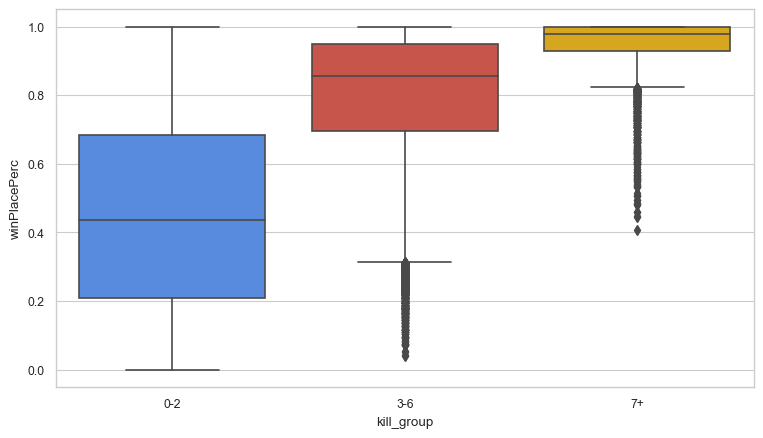

In [23]:
sns.boxplot(x="kill_group", y="winPlacePerc", data=df_kill_win)
plt.show()

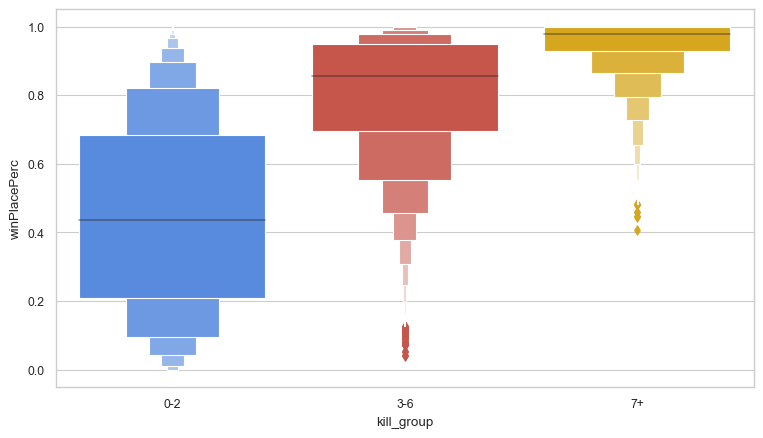

In [24]:
sns.boxenplot(x="kill_group", y="winPlacePerc", data=df_kill_win)
plt.show()

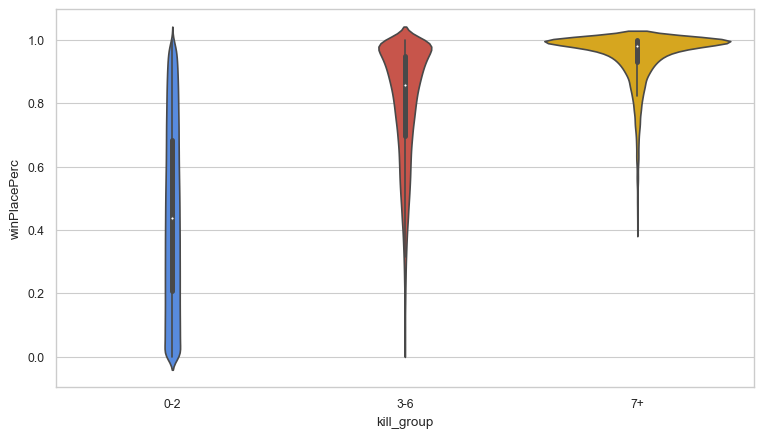

In [25]:
sns.violinplot(x="kill_group", y="winPlacePerc", data=df_kill_win)
plt.show()

In [26]:
df_kill_win.head()

,kills,winPlacePerc,kill_group
4,1,0.1875,0-2
7,0,0.7368,0-2
13,4,0.8750,3-6
17,2,0.8211,0-2
35,1,0.3474,0-2


### Facet Grid

In [27]:
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2,
           label,
           fontweight="bold",
           color=color,
           size=18,
           ha="left",
           va="center",
           transform=ax.transAxes)

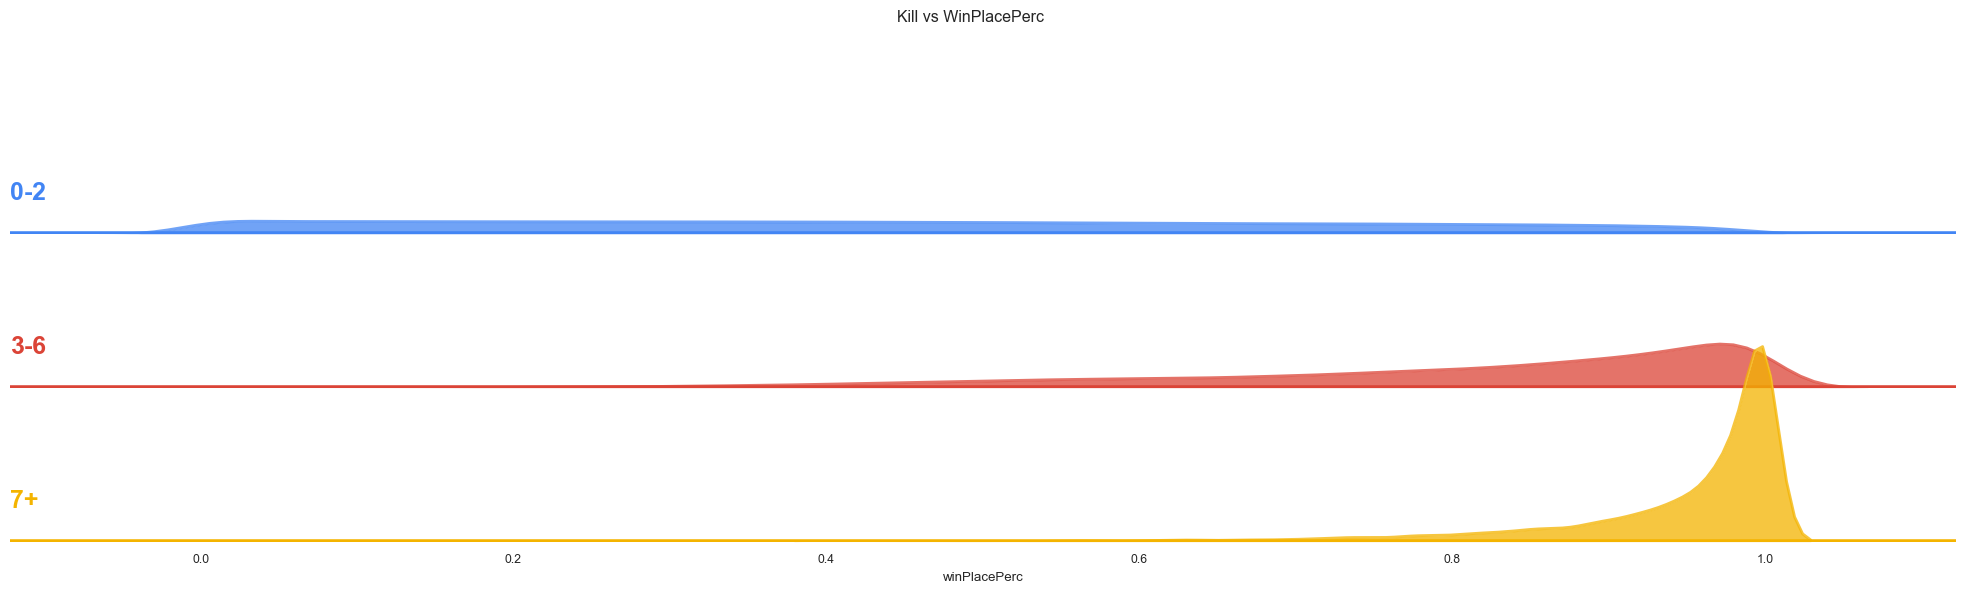

In [28]:
sns.set(context="paper", style="white", 
       rc={
           "figure.figsize": (9, 5),
           "figure.dpi": 100,
           "axes.facecolor": (0, 0, 0, 0)
       })

g = sns.FacetGrid(df_kill_win,
                  row='kill_group',
                  hue='kill_group',
                  aspect=10,
                  height=2,
                  palette=google)

g.map(sns.kdeplot, "winPlacePerc", lw=2, alpha=0.75, shade=True)
g.map(plt.axhline, y=0, lw=4)
g.map(label, "kill_group")

g.fig.subplots_adjust(hspace= -.25)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.xlabel("winPlacePerc")
plt.suptitle("Kill vs WinPlacePerc")
plt.show()

In [37]:
sns.set(context="paper", style="whitegrid", 
       rc={
           "figure.figsize": (9, 5),
           "figure.dpi": 100,
           "axes.facecolor": (0, 0, 0, 0)
       })


## swarn plot

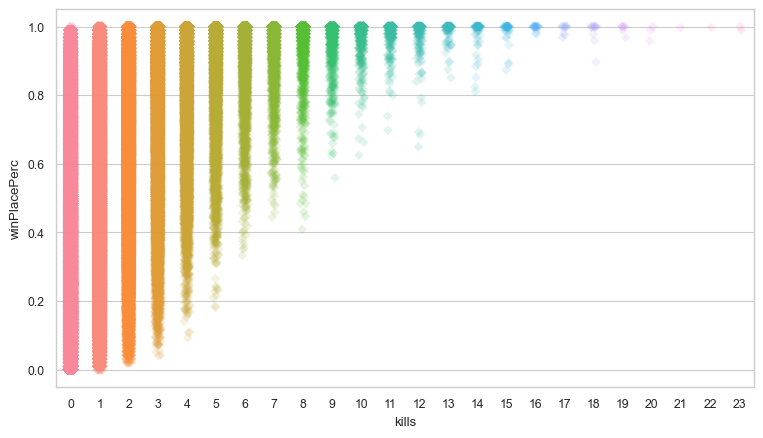

In [40]:
sns.stripplot(df['kills'], df['winPlacePerc'], marker="D", alpha=0.15)
plt.show()